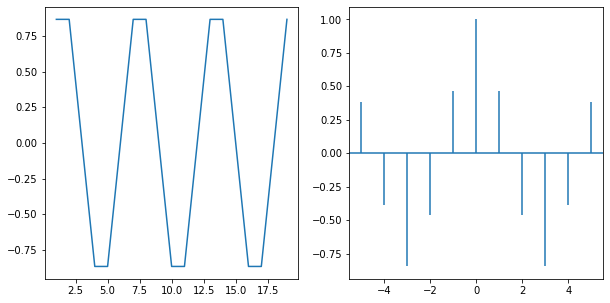

In [42]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

x=np.asarray([i for i in range(1,20)]);
y=np.sin(x*np.pi/3);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(10, 5)
axes[0].plot(x,y);
axes[1].acorr(y,maxlags=5);

In [43]:
acf=np.asarray(sm.tsa.stattools.ccf(y, y, adjusted=False))
print(acf)
print(acf.shape)

[ 1.          0.46726573 -0.45571245 -0.8461703  -0.3910997   0.37697903
  0.68977321  0.31151048 -0.3025246  -0.53851091 -0.23791185  0.22122379
  0.37954643  0.15575524 -0.14933676 -0.23085152 -0.08472401  0.06546855
  0.06931964]
(19,)


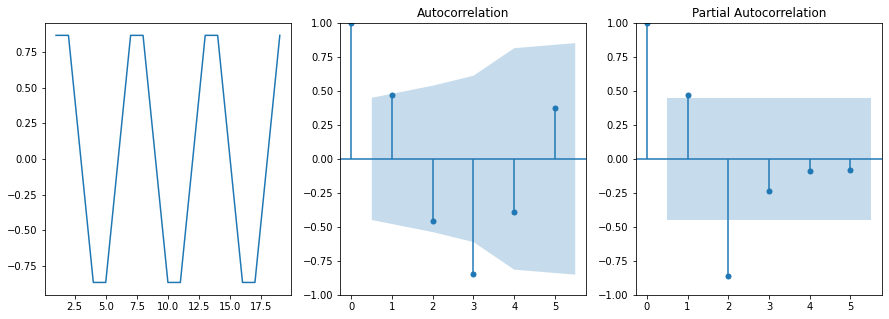

In [44]:
y1=np.sin(x*np.pi/3);
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 5)
axes[0].plot(x,y1)
plot_acf(y1,lags=5,ax=axes[1]);
plot_pacf(y1,lags=5,method="ywm",ax=axes[2]);

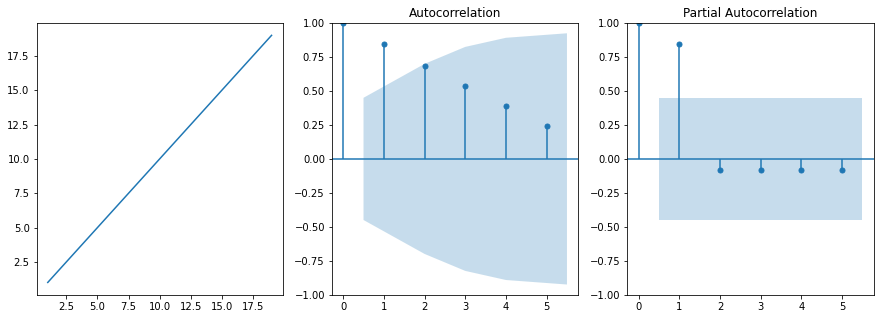

In [45]:
y2=x;
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 5)
axes[0].plot(x,y2)
plot_acf(y2,lags=5,ax=axes[1]);
plot_pacf(y2,lags=5,method="ywm",ax=axes[2]);

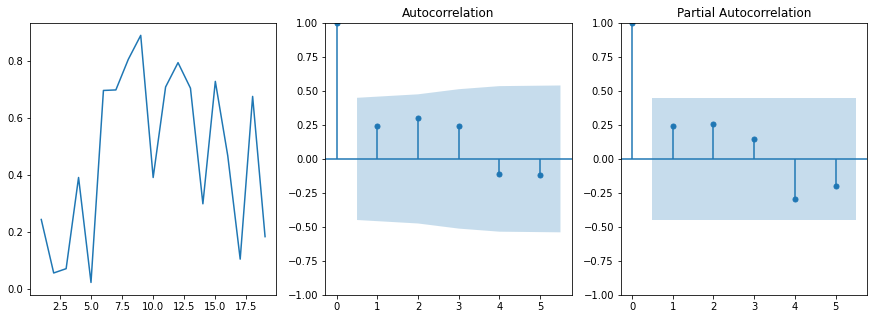

In [46]:
y3=np.random.random(19)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 5)
axes[0].plot(x,y3)
plot_acf(y3,lags=5,ax=axes[1]);
plot_pacf(y3,lags=5,method="ywm",ax=axes[2]);

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

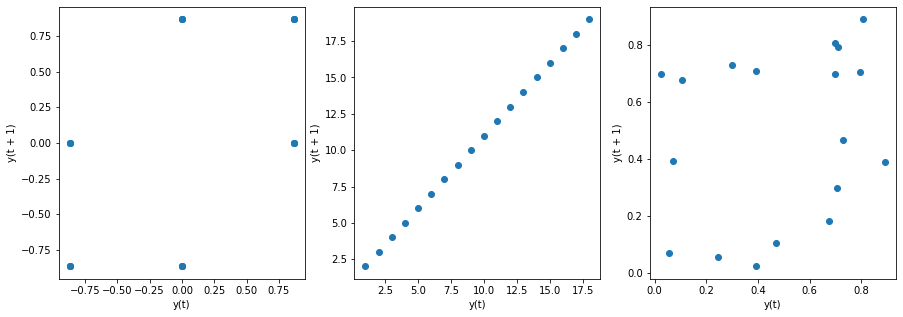

In [47]:
df_s1=pd.DataFrame(y1,dtype=float)
df_s2=pd.DataFrame(y2,dtype=float)
df_s3=pd.DataFrame(y3,dtype=float)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 5)
pd.plotting.lag_plot(df_s1, lag=1,ax=axes[0])
pd.plotting.lag_plot(df_s2, lag=1,ax=axes[1])
pd.plotting.lag_plot(df_s3, lag=1,ax=axes[2])

In [48]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2051930749785959.000000
p-value: 0.000000
Critical Values:
	1%: -4.012
	5%: -3.104
	10%: -2.691


In [49]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.170568
p-value: 0.941940
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [50]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y3)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.904522
p-value: 0.329937
Critical Values:
	1%: -3.924
	5%: -3.068
	10%: -2.674


In [51]:
from statsmodels.tsa.stattools import kpss
result = kpss(y1)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

KPSS Statistic: 0.054681
p-value: 0.100000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [52]:
result = kpss(y2)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

KPSS Statistic: 0.738441
p-value: 0.010051


In [53]:
result = kpss(y3)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

KPSS Statistic: 0.269393
p-value: 0.100000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


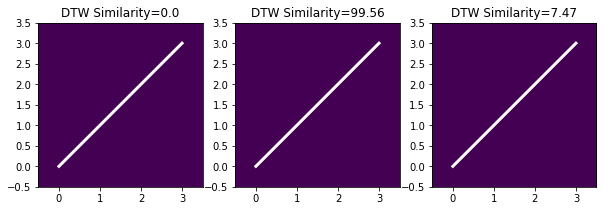

In [56]:
from scipy.spatial.distance import cdist
from tslearn import metrics

y1=np.tile(y1,[4,1])
y2=np.tile(y2,[4,1])
y3=np.tile(y3,[4,1])

x=[y1,y1,y1]
y=[y1,y2,y3]
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10, 10)
for i in range(3):
    path, sim = metrics.dtw_path(x[i], y[i])
    mat = cdist(x[i], y[i])
    axes[i].imshow(mat, origin='lower')
    axes[i].autoscale(False)
    axes[i].plot([j for (i, j) in path], [i for (i, j) in path], "w-",
             linewidth=3.)
    axes[i].set_title("DTW Similarity="+str(round(sim,2)));